In [10]:
from pytube import YouTube
import ffmpeg

import librosa
import soundfile as  sf
import os

import seaborn as sns
import matplotlib.pyplot as plt


## Pre Processamento

In [2]:
import pandas as pd
import numpy as np

In [3]:
def get_audio_features(audio_frame, sr, mfcc_n):
    
    mfcc_n = 13
    
    mfcc = librosa.feature.mfcc(y=audio_frame, sr=sr, n_mfcc=mfcc_n).mean(axis=1)
    zcr = librosa.feature.zero_crossing_rate(audio_frame).mean(axis=1)
    centroid = librosa.feature.spectral_centroid(y=audio_frame, sr=sr).mean(axis=1)
    bandwidth = librosa.feature.spectral_bandwidth(y=audio_frame, sr=sr).mean(axis=1)
    rms = librosa.feature.rms(y=audio_frame).mean(axis=1)
    
    features = np.concatenate([
        mfcc,
        zcr,
        centroid,
        bandwidth,
        rms,
        ])
    
    column_names = [f'mfcc_{i+1}' for i in range(mfcc_n)] + ['zcr', 'centroid', 'bandwidth', 'rms']

    
    return features,column_names

### Importa dados rotulados

In [185]:
labeled_data = pd.read_csv('train_data.csv')
labeled_data.tail(10)

,filename,label
611,./training_data/artista_md_680_ts_680.00s.wav,True
612,./training_data/artista_md_723_ts_723.00s.wav,False
613,./training_data/artista_md_732_ts_732.00s.wav,True
614,./training_data/artista_md_764_ts_764.00s.wav,True
615,./training_data/artista_md_823_ts_823.00s.wav,False
616,./training_data/artista_md_849_ts_849.00s.wav,False
617,./training_data/artista_md_897_ts_897.00s.wav,True
618,./training_data/artista_md_946_ts_946.00s.wav,False
619,./training_data/artista_md_970_ts_970.00s.wav,False
620,./training_data/artista_md_995_ts_995.00s.wav,True


In [29]:
feature_list = []
mfcc_n = 13

for index, row in labeled_data.iterrows():
    filename = row.filename
    label = row.label
    
    y, sr = librosa.load(filename, sr=None)
    
    features, columns = get_audio_features(y, sr, mfcc_n = mfcc_n)

    feature_list.append(features)
    

df_train = pd.DataFrame(feature_list, columns=columns)

In [30]:
df_train['filename'] = labeled_data.filename
df_train['label'] = labeled_data.label.astype(int)

In [31]:
df_train

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,zcr,centroid,bandwidth,rms,filename,label
0,-181.290329,112.909851,-53.723713,20.861216,-31.926888,0.789203,-18.178356,9.020755,-12.000977,-13.137233,-14.826611,0.869397,2.019023,0.098012,3459.463944,3196.832834,0.119731,./training_data/afonso_padilha__2487_to_2489.wav,0
1,-276.083557,94.015411,-60.457352,36.815723,-13.429616,1.172718,-24.766647,-8.378379,-13.885192,-9.918162,-15.664754,-14.136198,2.606982,0.092618,3472.128886,3083.665762,0.056356,./training_data/afonso_padilha__2227_to_2229.wav,0
2,-152.360031,140.983749,-56.317661,26.930645,-16.345730,2.032172,-27.528849,-1.619317,-20.962280,-17.794767,-15.692129,-5.474665,3.342934,0.055399,2489.293183,2775.212056,0.176130,./training_data/afonso_padilha__2652_to_2654.wav,0
3,-387.571533,104.240730,-13.806659,63.889778,-15.895926,2.498798,-10.321126,3.288330,-17.631989,-1.186452,-8.534275,-9.854637,-9.461058,0.092864,3580.099076,3444.347907,0.023026,./training_data/afonso_padilha__3582_to_3584.wav,0
4,-437.211060,112.357254,-17.942333,46.453796,-14.835730,15.504013,-17.264818,2.999510,-5.736117,4.140047,-14.605243,0.510420,3.976597,0.112463,3939.810373,3680.022242,0.011933,./training_data/afonso_padilha__791_to_793.wav,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,-325.872528,105.655121,-54.546982,36.522758,10.974843,5.925006,-11.979198,-1.126215,0.403177,-8.595112,-13.642378,-2.352717,-5.592578,0.077106,3044.209659,2886.922857,0.048483,./training_data/artista_md_849_ts_849.00s.wav,0
617,-237.346237,144.156494,-68.676071,24.223986,-9.922385,2.407722,-24.010384,-6.653044,-10.151432,-19.736723,-9.044890,1.986954,-4.574770,0.079347,2715.667765,2486.736302,0.067975,./training_data/artista_md_897_ts_897.00s.wav,1
618,-229.021545,126.385323,-66.702484,27.058834,-22.949329,-12.075966,-25.580597,-12.434455,-0.459273,-15.238078,-15.997652,0.799829,-8.934103,0.087374,3058.573096,2590.179722,0.094130,./training_data/artista_md_946_ts_946.00s.wav,0
619,-262.337433,139.566849,-59.655792,32.445808,6.724971,-2.918400,-31.434923,-12.136874,-6.052046,-22.498291,-11.957672,-3.985362,-9.145514,0.070301,2676.650194,2497.657502,0.069323,./training_data/artista_md_970_ts_970.00s.wav,0


### Split Train & Test

In [32]:
from sklearn.model_selection import train_test_split

# Features (X) e target (y)
X = df_train.drop(columns=["label"])
y = df_train["label"]

# Dividir entre treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # mantém a proporção de classes
)

# Juntar novamente em DataFrames se quiser manter o formato tabular
df_train_split = X_train.copy()
df_train_split["label"] = y_train.values

df_test_split = X_test.copy()
df_test_split["label"] = y_test.values

X_train = X_train.drop(columns=["filename"])
X_test = X_test.drop(columns=["filename"])

# Visualizar
print(df_train_split.shape, df_test_split.shape)


(496, 19) (125, 19)


### Train Model


🔍 Treinando: Random Forest
Acurácia: 0.8960
F1-score: 0.8116
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        85
           1       0.97      0.70      0.81        40

    accuracy                           0.90       125
   macro avg       0.92      0.84      0.87       125
weighted avg       0.90      0.90      0.89       125



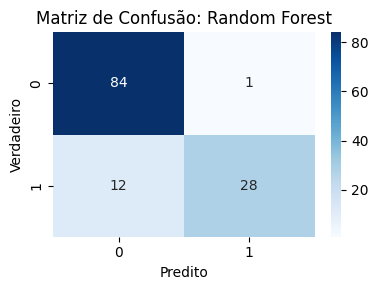


🔍 Treinando: XGBoost
Acurácia: 0.9040
F1-score: 0.8462
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        85
           1       0.87      0.82      0.85        40

    accuracy                           0.90       125
   macro avg       0.89      0.88      0.89       125
weighted avg       0.90      0.90      0.90       125



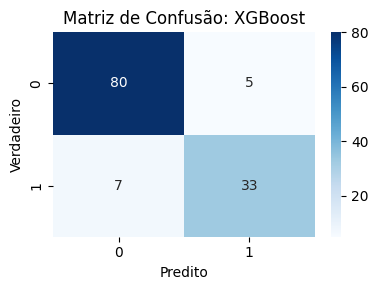


📊 Comparação de Modelos:
          Modelo  Acurácia  F1-score
1        XGBoost     0.904  0.846154
0  Random Forest     0.896  0.811594


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

models = {
    "Random Forest": RandomForestClassifier(random_state=42, min_samples_leaf = 5),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42, max_depth=4)
}

results = []

for name, model in models.items():
    print(f"\n🔍 Treinando: {name}")
    model.fit(X_train, y_train)
    
    proba = model.predict_proba(X_test)[:, 1]  # probabilidade da classe positiva (1)
        
    threshold = 0.55  # limite para considerar como classe positiva
    
    y_pred_thresh = (proba > threshold).astype(int)

    # Métricas
    acc = accuracy_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh, average="binary")

    print(f"Acurácia: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred_thresh))

    # Salvar resultados
    results.append({"Modelo": name, "Acurácia": acc, "F1-score": f1})

    # Plotar matriz de confusão
    cm = confusion_matrix(y_test, y_pred_thresh)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão: {name}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

df_results = pd.DataFrame(results)
print("\n📊 Comparação de Modelos:")
print(df_results.sort_values(by="F1-score", ascending=False))


In [34]:
df_test_split['predicted'] = y_pred_thresh

In [35]:
df_test_split.loc[df_test_split.label != df_test_split.predicted]

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,zcr,centroid,bandwidth,rms,filename,label,predicted
325,-296.607971,129.473679,-32.957260,40.694592,-6.651591,10.642402,-14.681635,1.636864,-9.385690,-12.236972,-9.452990,1.038820,5.163218,0.070329,2879.142534,3049.828163,0.043075,./training_data/afonso_padilha__1146_to_1148.wav,1,0
505,-196.774567,101.876289,-72.567993,35.399544,-24.137854,-9.032919,-23.426083,-1.677798,-23.726080,-10.527638,-20.647432,-5.766923,6.927379,0.089553,3265.135609,2892.180975,0.126451,./training_data/afonso_padilha__3080_to_3082.wav,1,0
423,-139.733566,97.857979,-47.703163,26.804777,-6.883520,23.499418,-45.828651,8.349159,-11.767628,0.832090,-13.334478,-9.749191,6.410993,0.108458,4140.534204,3783.693599,0.140566,./training_data/afonso_padilha__432_to_434.wav,1,0
314,-208.067917,130.817993,-52.870655,35.347202,-1.549160,13.534016,-27.413549,-2.099981,-7.539685,-17.012062,-4.187000,-5.634543,-0.035490,0.074258,2903.657098,2821.719429,0.117697,./training_data/afonso_padilha__3840_to_3842.wav,1,0
471,-145.553757,103.714111,-49.964718,42.386436,-38.894798,5.949432,-30.995466,15.139018,-19.664463,-7.968638,-16.765865,-0.589284,-0.212424,0.124574,4132.769335,3451.247806,0.152045,./training_data/afonso_padilha__2490_to_2492.wav,0,1
122,-174.057236,137.863388,-52.035877,39.911518,-16.296080,10.452760,-32.353554,-2.188911,-14.022290,-13.753229,-12.478378,-7.702218,6.013966,0.080236,2964.708723,2852.123184,0.138490,./training_data/afonso_padilha__1259_to_1261.wav,1,0
102,-71.058060,71.424652,-87.293671,14.305703,-13.645931,2.667505,-30.269377,3.464336,-13.209588,-2.233271,-4.148567,-2.056251,-7.171458,0.131692,4233.529518,3566.065002,0.227152,./training_data/afonso_padilha__407_to_409.wav,1,0
68,-244.915390,111.042328,-81.487717,44.243267,-11.556540,0.438539,-37.882057,-2.534559,-12.787078,-5.976041,-12.779099,-3.331473,0.751162,0.097916,3300.496342,2817.362909,0.069320,./training_data/afonso_padilha__942_to_944.wav,0,1
613,-176.235168,128.272964,-75.515114,45.021923,-6.997699,12.140539,-32.129330,-11.413071,-11.001030,-12.780732,-25.120453,-3.311979,-8.586446,0.075413,2915.135101,2689.512008,0.125635,./training_data/artista_md_732_ts_732.00s.wav,1,0
525,-216.351059,136.496384,-63.294777,30.653021,-7.866366,-1.527364,-30.894962,-9.614862,-13.733207,-23.631887,-16.744478,-4.571700,-7.466413,0.077250,2817.254233,2674.715775,0.090324,./training_data/artista_md_1218_ts_1218.00s.wav,0,1


# Teste

## Pré Processamento

### Separa Audio em frames de 2s + 1s de sobreposição

In [48]:
def split_audio_in_frames(audio, sr, frame_length_seconds = 2, hop_length_seconds = 1):
    
    frame_length = int(sr * frame_length_seconds)  # 2 segundos
    hop_length = int(sr * hop_length_seconds)    # 50% de sobreposição

    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length).T
    
    return frames

In [141]:
y, sr = librosa.load("./artista_TV.wav", sr=None)
frames_artista_tv = split_audio_in_frames(y, sr)

In [142]:
y, sr = librosa.load("./artista_RM.wav", sr=None)
frames_artista_rm = split_audio_in_frames(y, sr)

In [143]:
y, sr = librosa.load("./artista_MD.wav", sr=None)
frames_artista_md = split_audio_in_frames(y, sr)

In [145]:
y, sr = librosa.load("./artista_NV.wav", sr=None)
frames_artista_nv = split_audio_in_frames(y, sr)

In [147]:
y, sr = librosa.load("./artista_AP.wav", sr=None)
frames_artista_ap = split_audio_in_frames(y, sr)

### Gera as features

In [150]:
def gen_features(frames):
    feature_list = [] 
    for frame in frames:

        features, columns = get_audio_features(frame, sr, mfcc_n = mfcc_n)

        feature_list.append(features)
    column_names = [f'mfcc_{i+1}' for i in range(mfcc_n)] + ['zcr', 'centroid', 'bandwidth', 'rms']
    df_test = pd.DataFrame(feature_list, columns=column_names)
    
    print('Features Extracted!')
    
    return df_test

In [149]:
features_tv = gen_features(frames_artista_tv)
features_rm = gen_features(frames_artista_rm)
features_md = gen_features(frames_artista_md)
features_nv = gen_features(frames_artista_nv)
features_ap = gen_features(frames_artista_ap)

### Predict

In [151]:
def predict(df_features):
    
    proba = model.predict_proba(df_features)[:, 1]  # probabilidade da classe positiva (1)

    # Aplicar threshold:
    threshold = 0.55  # limiar para considerar como classe positiva

    y_pred_thresh = (proba > threshold).astype(int)
    df_features['label'] = y_pred_thresh
    
    return df_features

In [152]:
features_tv = predict(features_tv)
features_rm = predict(features_rm)
features_md = predict(features_md)
features_nv = predict(features_nv)
features_ap = predict(features_ap)

### Contagem de Risadas por minuto

In [153]:
from itertools import groupby

In [154]:
def contar_risadas_unicas_por_minuto(predictions, sr, hop_length_seconds):
    """
    Conta risadas únicas por minuto com base em sequências consecutivas de frames com valor 1.
    """
    
    hop_length = int(sr * hop_length_seconds) 
    
    # Calcula o tempo de início de cada frame
    frame_duration = hop_length / sr
    timestamps = np.arange(len(predictions)) * frame_duration

    # Cria DataFrame com os tempos e previsões
    df = pd.DataFrame({
        "timestamp_segundos": timestamps,
        "risada": predictions
    })

    # Identifica blocos consecutivos de risadas
    risadas = []
    em_risada = False
    inicio_risada = None

    for i, row in df.iterrows():
        if row["risada"] == 1:
            if not em_risada:
                em_risada = True
                inicio_risada = row["timestamp_segundos"]
        else:
            if em_risada:
                fim_risada = df.loc[i - 1, "timestamp_segundos"]
                risadas.append((inicio_risada, fim_risada))
                em_risada = False

    # Se terminar com risada, fecha a última
    if em_risada:
        risadas.append((inicio_risada, df.iloc[-1]["timestamp_segundos"]))

    # Cria DataFrame com início de cada risada
    df_risadas = pd.DataFrame(risadas, columns=["inicio", "fim"])
    df_risadas["minuto"] = (df_risadas["inicio"] // 60).astype(int)
    df_risadas['inicio_seg'] = df_risadas.inicio - (df_risadas.minuto * 60)
    df_risadas['duração'] = df_risadas.fim - df_risadas.inicio

    # Conta número de risadas únicas por minuto
    contagem = df_risadas.groupby("minuto").size().reset_index(name="risadas_unicas")
    
    minutos_total = contagem.minuto.max()
    risadas_unicas_total = contagem.risadas_unicas.sum()
    max_risadas = contagem.risadas_unicas.max()
    risadas_por_minuto = risadas_unicas_total/minutos_total
    max_duracao_risada =  df_risadas['duração'].max()
    avg_duracao_risada =  round(df_risadas['duração'].mean())
    tempo_total_rindo = round(df_risadas['duração'].sum()/60)

    print(f'A duração da apresentação em minutos é: {minutos_total}')
    print(f'O valor de risadas por minuto é: {risadas_por_minuto}')
    print(f'O máximo de risadas em 1 minuto é: {max_risadas}')
    print(f'O tempo total de risadas durante a apresentação é de {tempo_total_rindo} minutos')
    print(f'Na apresentação, a duração média de uma risada é {avg_duracao_risada}s e a risada que durou mais tempo foi de {max_duracao_risada}s')


    return contagem, df_risadas


In [203]:
def plot_risadas_por_minuto_seaborn(contagem_df):
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=contagem_df, x="minuto", y="risadas_unicas", marker='o')
    plt.title("Risadas únicas por minuto")
    plt.xlabel("Minuto")
    plt.ylabel("Contagem de risadas")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [163]:
boxplot_data = {}

In [192]:
pd.DataFrame([6.804878048780488,7.430555555555555,4.493670886075949,6.448275862068965,6.6571428571428575]).mean()

0    6.366905
dtype: float64

### Artista TV

A duração da apresentação em minutos é: 82
O valor de risadas por minuto é: 6.804878048780488
O máximo de risadas em 1 minuto é: 14
O tempo total de risadas durante a apresentação é de 12 minutos
Na apresentação, a duração média de uma risada é 1s e a risada que durou mais tempo foi de 17.0s


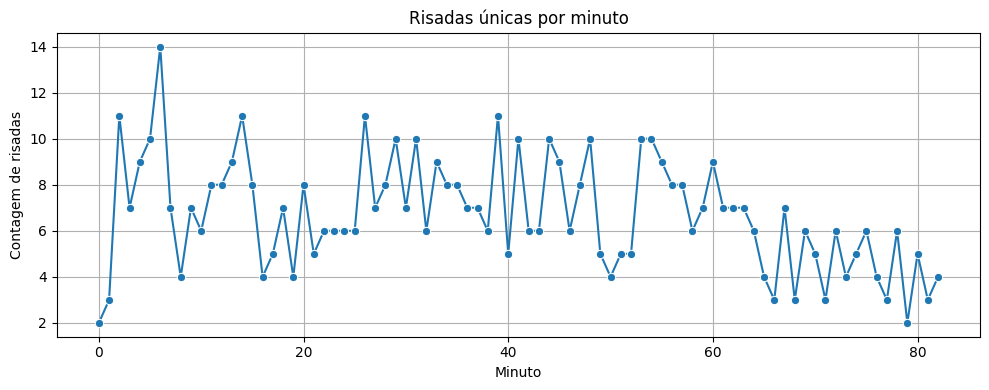

In [197]:
contagem, detalhes = contar_risadas_unicas_por_minuto(features_tv.label, sr, hop_length_seconds = 1)
boxplot_data["artista_tv"] = contagem.risadas_unicas
plot_risadas_por_minuto_seaborn(contagem)

### Artista RM

A duração da apresentação em minutos é: 72
O valor de risadas por minuto é: 7.430555555555555
O máximo de risadas em 1 minuto é: 12
O tempo total de risadas durante a apresentação é de 23 minutos
Na apresentação, a duração média de uma risada é 3s e a risada que durou mais tempo foi de 22.0s


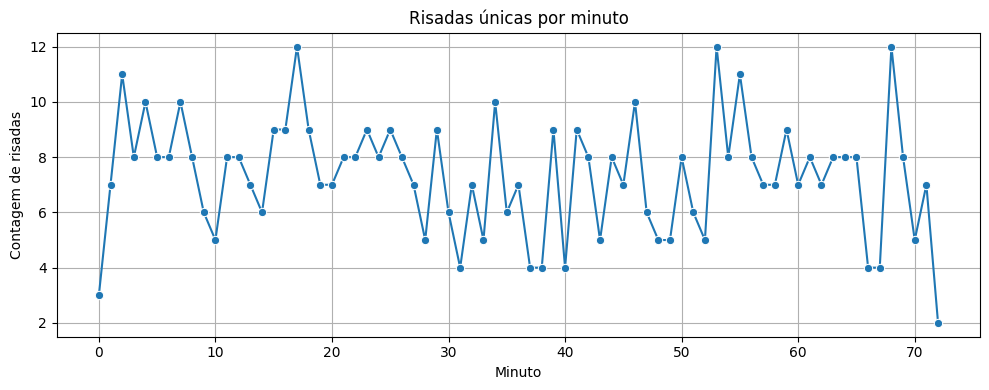

In [198]:
contagem, detalhes = contar_risadas_unicas_por_minuto(features_rm.label, sr, hop_length_seconds = 1)
boxplot_data["artista_rm"] = contagem.risadas_unicas
plot_risadas_por_minuto_seaborn(contagem)

### Artista MD

A duração da apresentação em minutos é: 79
O valor de risadas por minuto é: 4.493670886075949
O máximo de risadas em 1 minuto é: 9
O tempo total de risadas durante a apresentação é de 23 minutos
Na apresentação, a duração média de uma risada é 4s e a risada que durou mais tempo foi de 36.0s


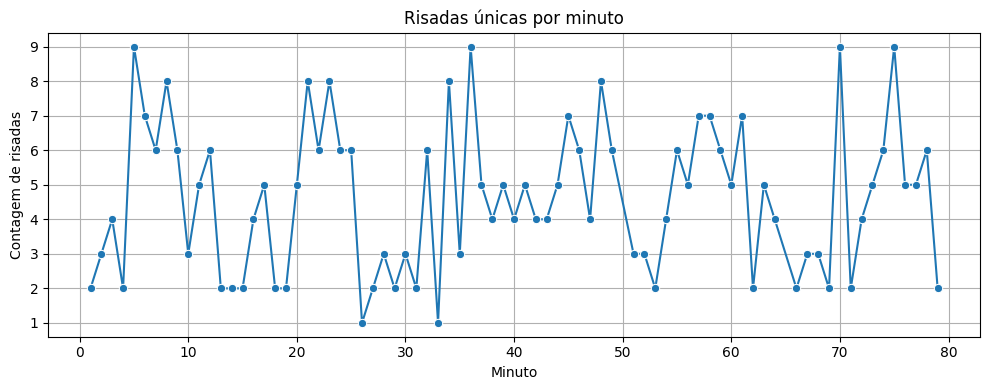

In [199]:
contagem, detalhes = contar_risadas_unicas_por_minuto(features_md.label, sr, hop_length_seconds = 1)
boxplot_data["artista_md"] = contagem.risadas_unicas
plot_risadas_por_minuto_seaborn(contagem)

### Artista NV

A duração da apresentação em minutos é: 58
O valor de risadas por minuto é: 6.448275862068965
O máximo de risadas em 1 minuto é: 10
O tempo total de risadas durante a apresentação é de 19 minutos
Na apresentação, a duração média de uma risada é 3s e a risada que durou mais tempo foi de 48.0s


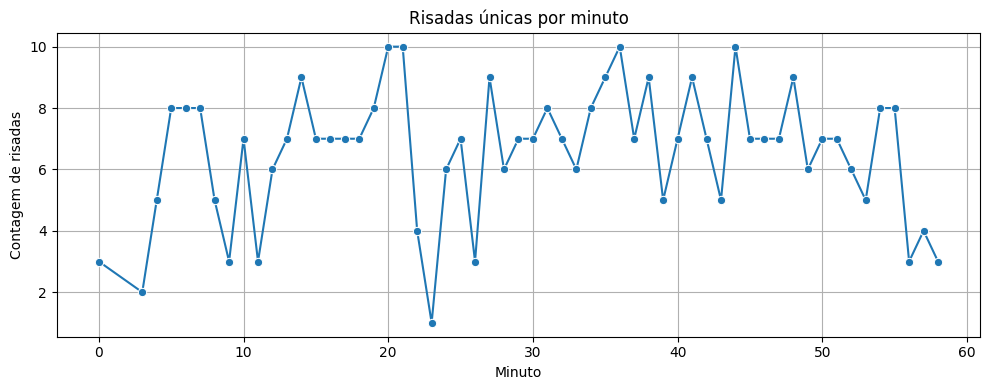

In [200]:
contagem, detalhes = contar_risadas_unicas_por_minuto(features_nv.label, sr, hop_length_seconds = 1)
boxplot_data["artista_nv"] = contagem.risadas_unicas
plot_risadas_por_minuto_seaborn(contagem)

### Artista AP

A duração da apresentação em minutos é: 70
O valor de risadas por minuto é: 6.6571428571428575
O máximo de risadas em 1 minuto é: 11
O tempo total de risadas durante a apresentação é de 13 minutos
Na apresentação, a duração média de uma risada é 2s e a risada que durou mais tempo foi de 25.0s


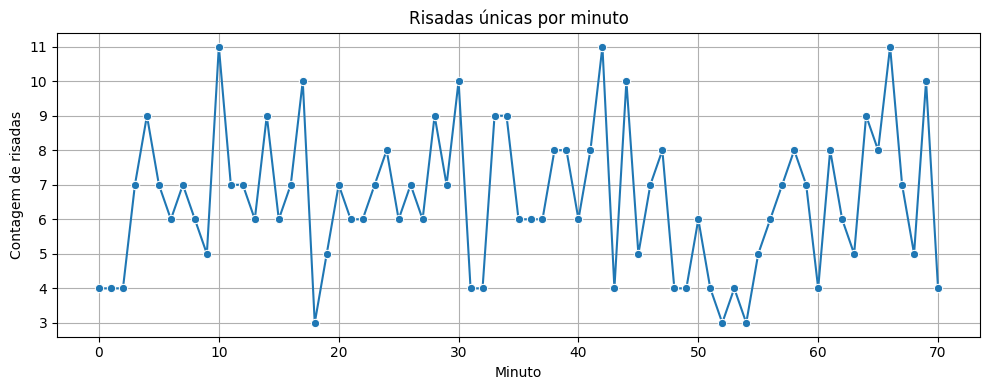

In [201]:
contagem, detalhes = contar_risadas_unicas_por_minuto(features_ap.label, sr, hop_length_seconds = 1)
boxplot_data["artista_ap"] = contagem.risadas_unicas
plot_risadas_por_minuto_seaborn(contagem)